In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/Shreyansh Upadhyay/Desktop/Courses/US Counties COVID 19 Datasets')

In [2]:
data=pd.read_csv('us-counties.csv')
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [3]:
data.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths      int64
dtype: object

In [4]:
data.shape

(30843, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30843 entries, 0 to 30842
Data columns (total 6 columns):
date      30843 non-null object
county    30843 non-null object
state     30843 non-null object
fips      30388 non-null float64
cases     30843 non-null int64
deaths    30843 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.4+ MB


In [6]:
data.isnull().sum()

date        0
county      0
state       0
fips      455
cases       0
deaths      0
dtype: int64

In [7]:
data.describe()

,fips,cases,deaths
count,30388.000000,30843.000000,30843.000000
mean,29249.306568,59.337937,1.151607
std,15642.441466,778.748660,20.304794
min,1001.000000,0.000000,0.000000
25%,17073.000000,1.000000,0.000000
50%,28107.000000,4.000000,0.000000
75%,42095.000000,14.000000,0.000000
max,56043.000000,57160.000000,1867.000000


In [8]:
data['fips'].fillna(29249.31, inplace=True)

In [9]:
data.corr()

,fips,cases,deaths
fips,1.000000,-0.000575,-0.001474
cases,-0.000575,1.000000,0.920842
deaths,-0.001474,0.920842,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x2258b4abf60>,
 'caps': [<matplotlib.lines.Line2D at 0x2258b4c1630>,
 'boxes': [<matplotlib.lines.Line2D at 0x2258b4abb38>],
 'medians': [<matplotlib.lines.Line2D at 0x2258b4c1cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2258b4c1da0>],
 'means': []}

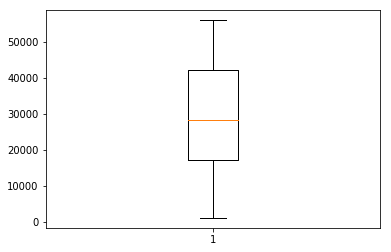

In [10]:
plt.boxplot(data['fips'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2258b53eb38>,
 'caps': [<matplotlib.lines.Line2D at 0x2258b53ef60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2258b53e710>],
 'medians': [<matplotlib.lines.Line2D at 0x2258b547898>],
 'fliers': [<matplotlib.lines.Line2D at 0x2258b547860>],
 'means': []}

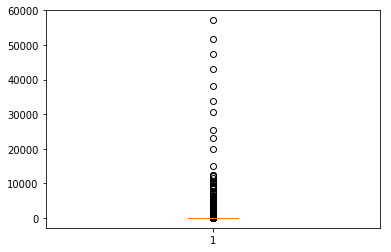

In [11]:
plt.boxplot(data['cases'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2258b5a0b70>,
 'caps': [<matplotlib.lines.Line2D at 0x2258b5a0f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x2258b5a0748>],
 'medians': [<matplotlib.lines.Line2D at 0x2258b5aa8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2258b5aac18>],
 'means': []}

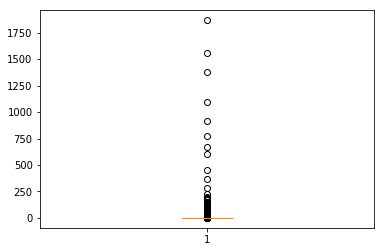

In [12]:
plt.boxplot(data['deaths'])

In [13]:
import sklearn
from sklearn.preprocessing import StandardScaler,scale,normalize
x=data[['fips', 'cases']]
y=data['deaths']

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.4)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
from sklearn.model_selection import train_test_split
x=data[['fips', 'cases']]
y=data['deaths']

In [17]:
x=pd.get_dummies(x)

In [18]:
x

,fips,cases
0,53061.0,1
1,53061.0,1
2,53061.0,1
3,17031.0,1
4,53061.0,1
5,6059.0,1
6,17031.0,1
7,53061.0,1
8,4013.0,1
9,6037.0,1


In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35)

In [20]:
print(x_train.shape)
print(x_test.shape)

(20047, 2)
(10796, 2)


In [21]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
pred = model.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,pred)

array([[8520,  333,   68, ...,    0,    0,    0],
       [ 326,  535,   44, ...,    0,    0,    0],
       [  52,   49,  128, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [25]:
accuracy_score(y_test,pred)

0.8624490552056318

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

In [27]:
mean_absolute_error(y_test,pred)

0.5840125972582438

In [28]:
mean_squared_error(y_test,pred)

54.75

In [29]:
mean_squared_log_error(y_test,pred)

0.10252728196508148

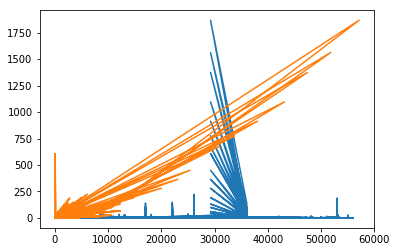

In [30]:
plt.plot(x,y)